# Nhập dữ liệu

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from sklearn.preprocessing import LabelEncoder



### Tổng quan bộ dữ liệu

In [ ]:
data_path = r"D:\THOW\Nam_3\AI project\Sprint 2\Code_AIPj\hotel.csv"

# 🔹 Đọc dữ liệu
df = pd.read_csv(data_path)
print(df.shape)
print(df.info())

# 🔹 Xem 5 dòng đầu tiên
df.head(5)

(119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  mea

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [60]:
print(df.columns)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


### Thuộc tính số (Numerical Attributes)

- is_canceled: Cho biết phòng được đặt có bị hủy không (1 = Hủy, 0 = Không hủy).
- lead_time: Số ngày giữa thời điểm đặt phòng và ngày đến.
- arrival_date_year: Năm của ngày đến.
- arrival_date_week_number: Tuần trong năm của ngày đến.
- arrival_date_day_of_month: Ngày trong tháng của ngày đến.
- stays_in_weekend_nights: Số đêm cuối tuần (Thứ Bảy, Chủ Nhật) khách ở hoặc đặt.
- stays_in_week_nights: Số đêm trong tuần (Thứ Hai–Thứ Sáu) khách ở hoặc đặt.
- adults: Số lượng người lớn trong đặt phòng.
- children: Số lượng trẻ em trong đặt phòng.
- babies: Số lượng trẻ sơ sinh trong đặt phòng.
- previous_cancellations: Số lần đặt phòng trước đó bị hủy của khách.
- previous_bookings_not_canceled: Số lần đặt phòng trước đó không bị hủy.
- booking_changes: Số lần thay đổi trong đặt phòng.
- days_in_waiting_list: Số ngày đặt phòng nằm trong danh sách chờ.
- adr: Giá trung bình mỗi đêm (Average Daily Rate).
- required_car_parking_spaces: Số chỗ đậu xe yêu cầu.
- total_of_special_requests: Tổng số yêu cầu đặc biệt từ khách.

### Thuộc tính phân loại (Categorical Attributes)

- hotel: Loại khách sạn (ví dụ: City Hotel, Resort Hotel).
- arrival_date_month: Tháng của ngày đến.
- meal: Loại gói ăn được đặt.
- country: Quốc gia xuất xứ của khách.
- market_segment: Phân khúc thị trường (ví dụ: Online TA, Groups).
- distribution_channel: Kênh đặt phòng (ví dụ: Direct, Corporate).
- is_repeated_guest: Khách đã từng ở khách sạn trước đây (1 = Có, 0 = Không).
- reserved_room_type: Loại phòng được đặt.
- assigned_room_type: Loại phòng được sắp xếp.
- deposit_type: Loại đặt cọc (ví dụ: No Deposit, Refundable).
- customer_type: Loại khách hàng (ví dụ: Transient, Group).
- reservation_status: Trạng thái hiện tại của đặt phòng (Canceled, No-Show, Checked-Out).
- reservation_status_date: Ngày cập nhật trạng thái gần nhất.

### Thuộc tính bổ sung (Additional Attributes)

- agent: ID của đại lý du lịch.
- company: ID công ty thực hiện đặt phòng.


##### Các cột 'is_repeated_guest' và 'is_canceled' nên có kiểu dữ liệu boolean. Tuy nhiên, kết quả ở ô trên cho thấy chúng đang có kiểu dữ liệu integer. Vì vậy, cần chuyển kiểu dữ liệu của chúng sang bool.

In [61]:
df[['is_repeated_guest','is_canceled']] = df[['is_repeated_guest','is_canceled']].astype(bool)
print(df['is_repeated_guest'].dtype)

bool


### Kiểu tra bất thường trong bộ dữ liệu


#### Kiểm tra missing value :

In [62]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

 **Thấy được**
Các cột có missing values:
`country`: 488 missing values
`agent`: 16340 missing values
`company`: 112593 missing values

In [64]:
# Xử lý company trước
if 'company' in df.columns:
    missing_pct = df['company'].isnull().sum() / len(df)
    if missing_pct > 0.9:
        print(f"Xóa cột 'company' (thiếu {missing_pct*100:.1f}%)")
        df = df.drop('company', axis=1)
    else:
        df['company'] = df['company'].fillna(0)

# Điền giá trị thiếu - KHÔNG dùng inplace=True
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['agent'] = df['agent'].fillna(0)

# Kiểm tra kết quả
print(f"Tổng giá trị thiếu còn lại: {df.isnull().sum().sum()}")

Tổng giá trị thiếu còn lại: 0


In [70]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

**Phân tích đơn biến (Univariate analysis)** : 


#### Kiểm tra trùng lặp : 

In [65]:
# Tìm các hàng trùng lặp
duplicated_rows = df[df.duplicated()]

print(f"Tổng số hàng trùng lặp: {len(duplicated_rows)}")
print("\nSố lượng giá trị không null theo từng cột:")
print(duplicated_rows.count())

Tổng số hàng trùng lặp: 32013

Số lượng giá trị không null theo từng cột:
hotel                             32013
is_canceled                       32013
lead_time                         32013
arrival_date_year                 32013
arrival_date_month                32013
arrival_date_week_number          32013
arrival_date_day_of_month         32013
stays_in_weekend_nights           32013
stays_in_week_nights              32013
adults                            32013
children                          32013
babies                            32013
meal                              32013
country                           32013
market_segment                    32013
distribution_channel              32013
is_repeated_guest                 32013
previous_cancellations            32013
previous_bookings_not_canceled    32013
reserved_room_type                32013
assigned_room_type                32013
booking_changes                   32013
deposit_type                      32013
agent 

In [66]:
# Xem một vài hàng trùng lặp để hiểu dữ liệu
print("Mẫu các hàng trùng lặp:")
print(duplicated_rows.head(10))

# Kiểm tra xem trùng lặp hoàn toàn hay chỉ một số cột
print("\nKiểm tra trùng lặp tất cả cột:")
print(df.duplicated(keep=False).sum())  # Bao gồm cả bản gốc và bản sao

df_clean = df.drop_duplicates(keep='first')
print(f"Số hàng trước khi xóa: {len(df)}")
print(f"Số hàng sau khi xóa: {len(df_clean)}")
print(f"Đã xóa: {len(df) - len(df_clean)} hàng")

Mẫu các hàng trùng lặp:
            hotel  is_canceled  lead_time  arrival_date_year  \
5    Resort Hotel        False         14               2015   
22   Resort Hotel        False         72               2015   
43   Resort Hotel        False         70               2015   
138  Resort Hotel         True          5               2015   
200  Resort Hotel        False          0               2015   
219  Resort Hotel         True          1               2015   
256  Resort Hotel        False         91               2015   
261  Resort Hotel        False         30               2015   
353  Resort Hotel        False         98               2015   
372  Resort Hotel        False         40               2015   

    arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
5                 July                        27                          1   
22                July                        27                          1   
43                July            

In [67]:
# Xóa trùng lặp
df_cleaned = df.drop_duplicates()

# Kiểm tra lại
print(f"Số hàng trùng còn lại: {df_cleaned.duplicated().sum()}")

# Xem thông tin DataFrame sau khi làm sạch
print(df_cleaned.info())

Số hàng trùng còn lại: 0
<class 'pandas.core.frame.DataFrame'>
Index: 87377 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87377 non-null  object 
 1   is_canceled                     87377 non-null  bool   
 2   lead_time                       87377 non-null  int64  
 3   arrival_date_year               87377 non-null  int64  
 4   arrival_date_month              87377 non-null  object 
 5   arrival_date_week_number        87377 non-null  int64  
 6   arrival_date_day_of_month       87377 non-null  int64  
 7   stays_in_weekend_nights         87377 non-null  int64  
 8   stays_in_week_nights            87377 non-null  int64  
 9   adults                          87377 non-null  int64  
 10  children                        87377 non-null  float64
 11  babies                          87377 non-null  int64  
 12  meal       

#### Kiểm tra outlier

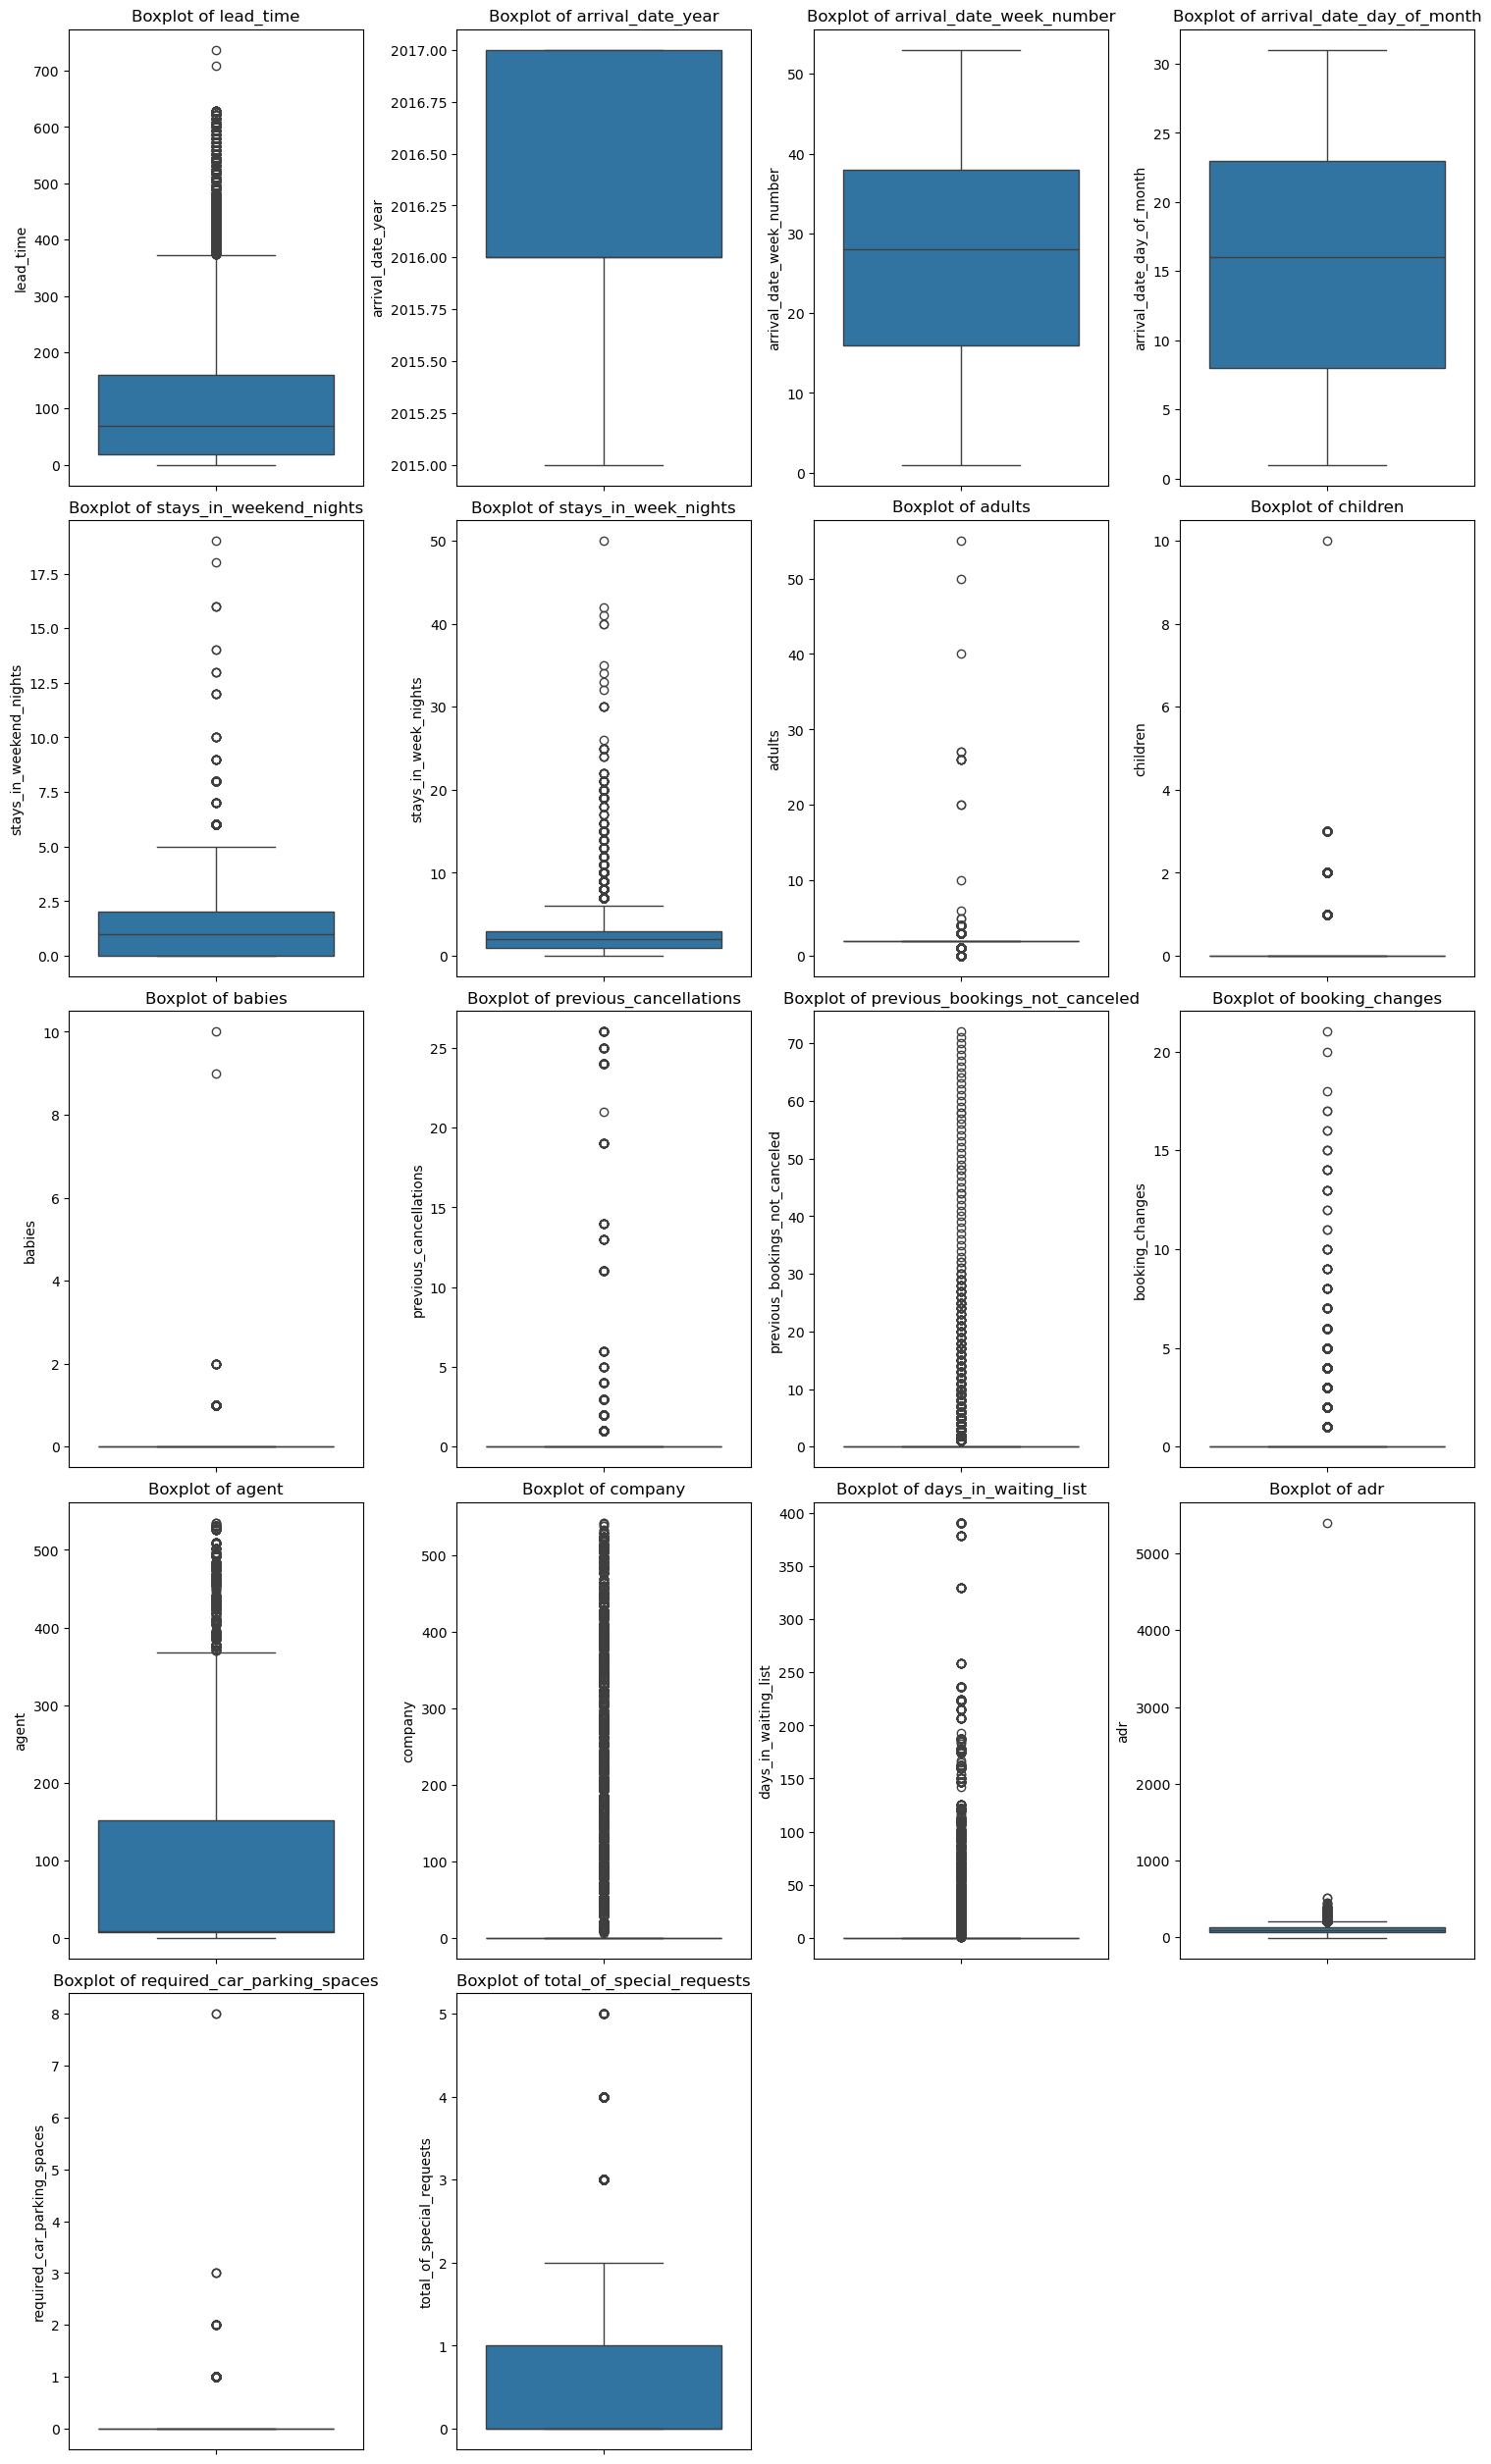

In [68]:
import math
numeric_cols = df.select_dtypes(include=['number']).columns

# Define rows and columns based on the number of numeric columns
num_plots = len(numeric_cols)
columns = 4
rows = math.ceil(num_plots / columns)  # Calculate the number of rows needed

# Create subplots grid
fig, axes = plt.subplots(rows, columns, figsize=(15, 5 * rows), constrained_layout=True)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")  # Remove x-label for better spacing

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete extra axes

# Show the plots
plt.show()

### Xử lí Oulier

**Xử lý ngoại lệ và giá trị bất thường trong dữ liệu đặt phòng:**

- **Stays in Week Nights:** Quan sát có giá trị >50 đêm. Xử lý bằng cách giới hạn tối đa 30 đêm và có thể phân loại ngắn/trung/dài.  
- **Stays in Weekend Nights:** Quan sát có giá trị >17 đêm. Giới hạn tối đa 10 đêm.  
- **Adults, Children, Babies:** Quan sát có giá trị bất thường (adults >50, children >10). Lọc các giá trị không hợp lý (adults ≤10, children ≤10, babies ≤5) và điền giá trị thiếu (children = median, babies = 0).  
- **Previous Cancellations & Previous Bookings Not Canceled:** Quan sát có giá trị >20. Giới hạn tối đa 10, đồng thời phân tích các trường hợp hủy/đặt nhiều.  
- **Booking Changes:** Một số booking có >10 thay đổi. Giới hạn tối đa 5 và kiểm tra nguyên nhân các booking thay đổi nhiều.  
- **Days in Waiting List:** Quan sát có giá trị >300 ngày. Giới hạn tối đa 200 ngày và phân loại ngắn/trung/dài cho phân tích.

In [72]:
df['stays_in_week_nights'] = np.where(df['stays_in_week_nights'] > 30, 30, df['stays_in_week_nights'])
df['stays_in_weekend_nights'] = np.where(df['stays_in_weekend_nights'] > 10, 10, df['stays_in_weekend_nights'])

df = df[(df['adults'] <= 10) & (df['children'] <= 10) & (df['babies'] <= 5)]
df.fillna({'children': df['children'].median(), 'babies': 0}, inplace=True)

df['previous_cancellations'] = np.where(df['previous_cancellations'] > 10, 10, df['previous_cancellations'])
df['previous_bookings_not_canceled'] = np.where(df['previous_bookings_not_canceled'] > 10, 10, df['previous_bookings_not_canceled'])
df['booking_changes'] = np.where(df['booking_changes'] > 5, 5, df['booking_changes'])
df['days_in_waiting_list'] = np.where(df['days_in_waiting_list'] > 200, 200, df['days_in_waiting_list'])

##### Kết quả phân tích đơn biến (Univariate Analysis)

Các phát hiện chính như sau:

- Phân bố của biến hủy đặt phòng (cancellation) theo giá trị True/False: Thống kê cho thấy tỉ lệ khách hủy so với không hủy. Giúp hiểu được biến mục tiêu (target variable) có cân bằng hay lệch về một phía.

- Biến mục tiêu “lead time” bị lệch phải mạnh (positively skewed): Giá trị của “lead time” (số giờ trước khi khách đến thực tế) phần lớn là nhỏ, nhưng có một số giá trị lớn kéo dài về bên phải. Điều này làm trung bình bị kéo lên, không phản ánh đúng “giá trị điển hình”.

- Đường phân bố của lead time có hình Platykurtic (đỉnh thấp, rộng và đuôi ngắn, mỏng). Điều này có nghĩa là dữ liệu phân tán rộng, ít tập trung quanh trung bình, các giá trị cực đoan (outliers) ít hơn so với phân bố chuẩn.

- Dữ liệu Lead Time theo giờ gần giống phân bố log-normal hơn là phân bố chuẩn. Điều này phù hợp với dữ liệu thời gian, vốn không thể âm và thường có một số giá trị rất lớn (long tail).

##### Thống kê tóm tắt các cột có định dạng giá trị là số


In [73]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(df[numeric_columns].describe())

           lead_time  arrival_date_year  arrival_date_week_number  \
count  119376.000000      119376.000000             119376.000000   
mean      103.989068        2016.156681                 27.164087   
std       106.842628           0.707414                 13.605179   
min         0.000000        2015.000000                  1.000000   
25%        18.000000        2016.000000                 16.000000   
50%        69.000000        2016.000000                 28.000000   
75%       160.000000        2017.000000                 38.000000   
max       737.000000        2017.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count              119376.000000            119376.000000   
mean                   15.798712                 0.927012   
std                     8.780852                 0.992491   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%         

##### **Xu hướng trung tâm**  :  
 

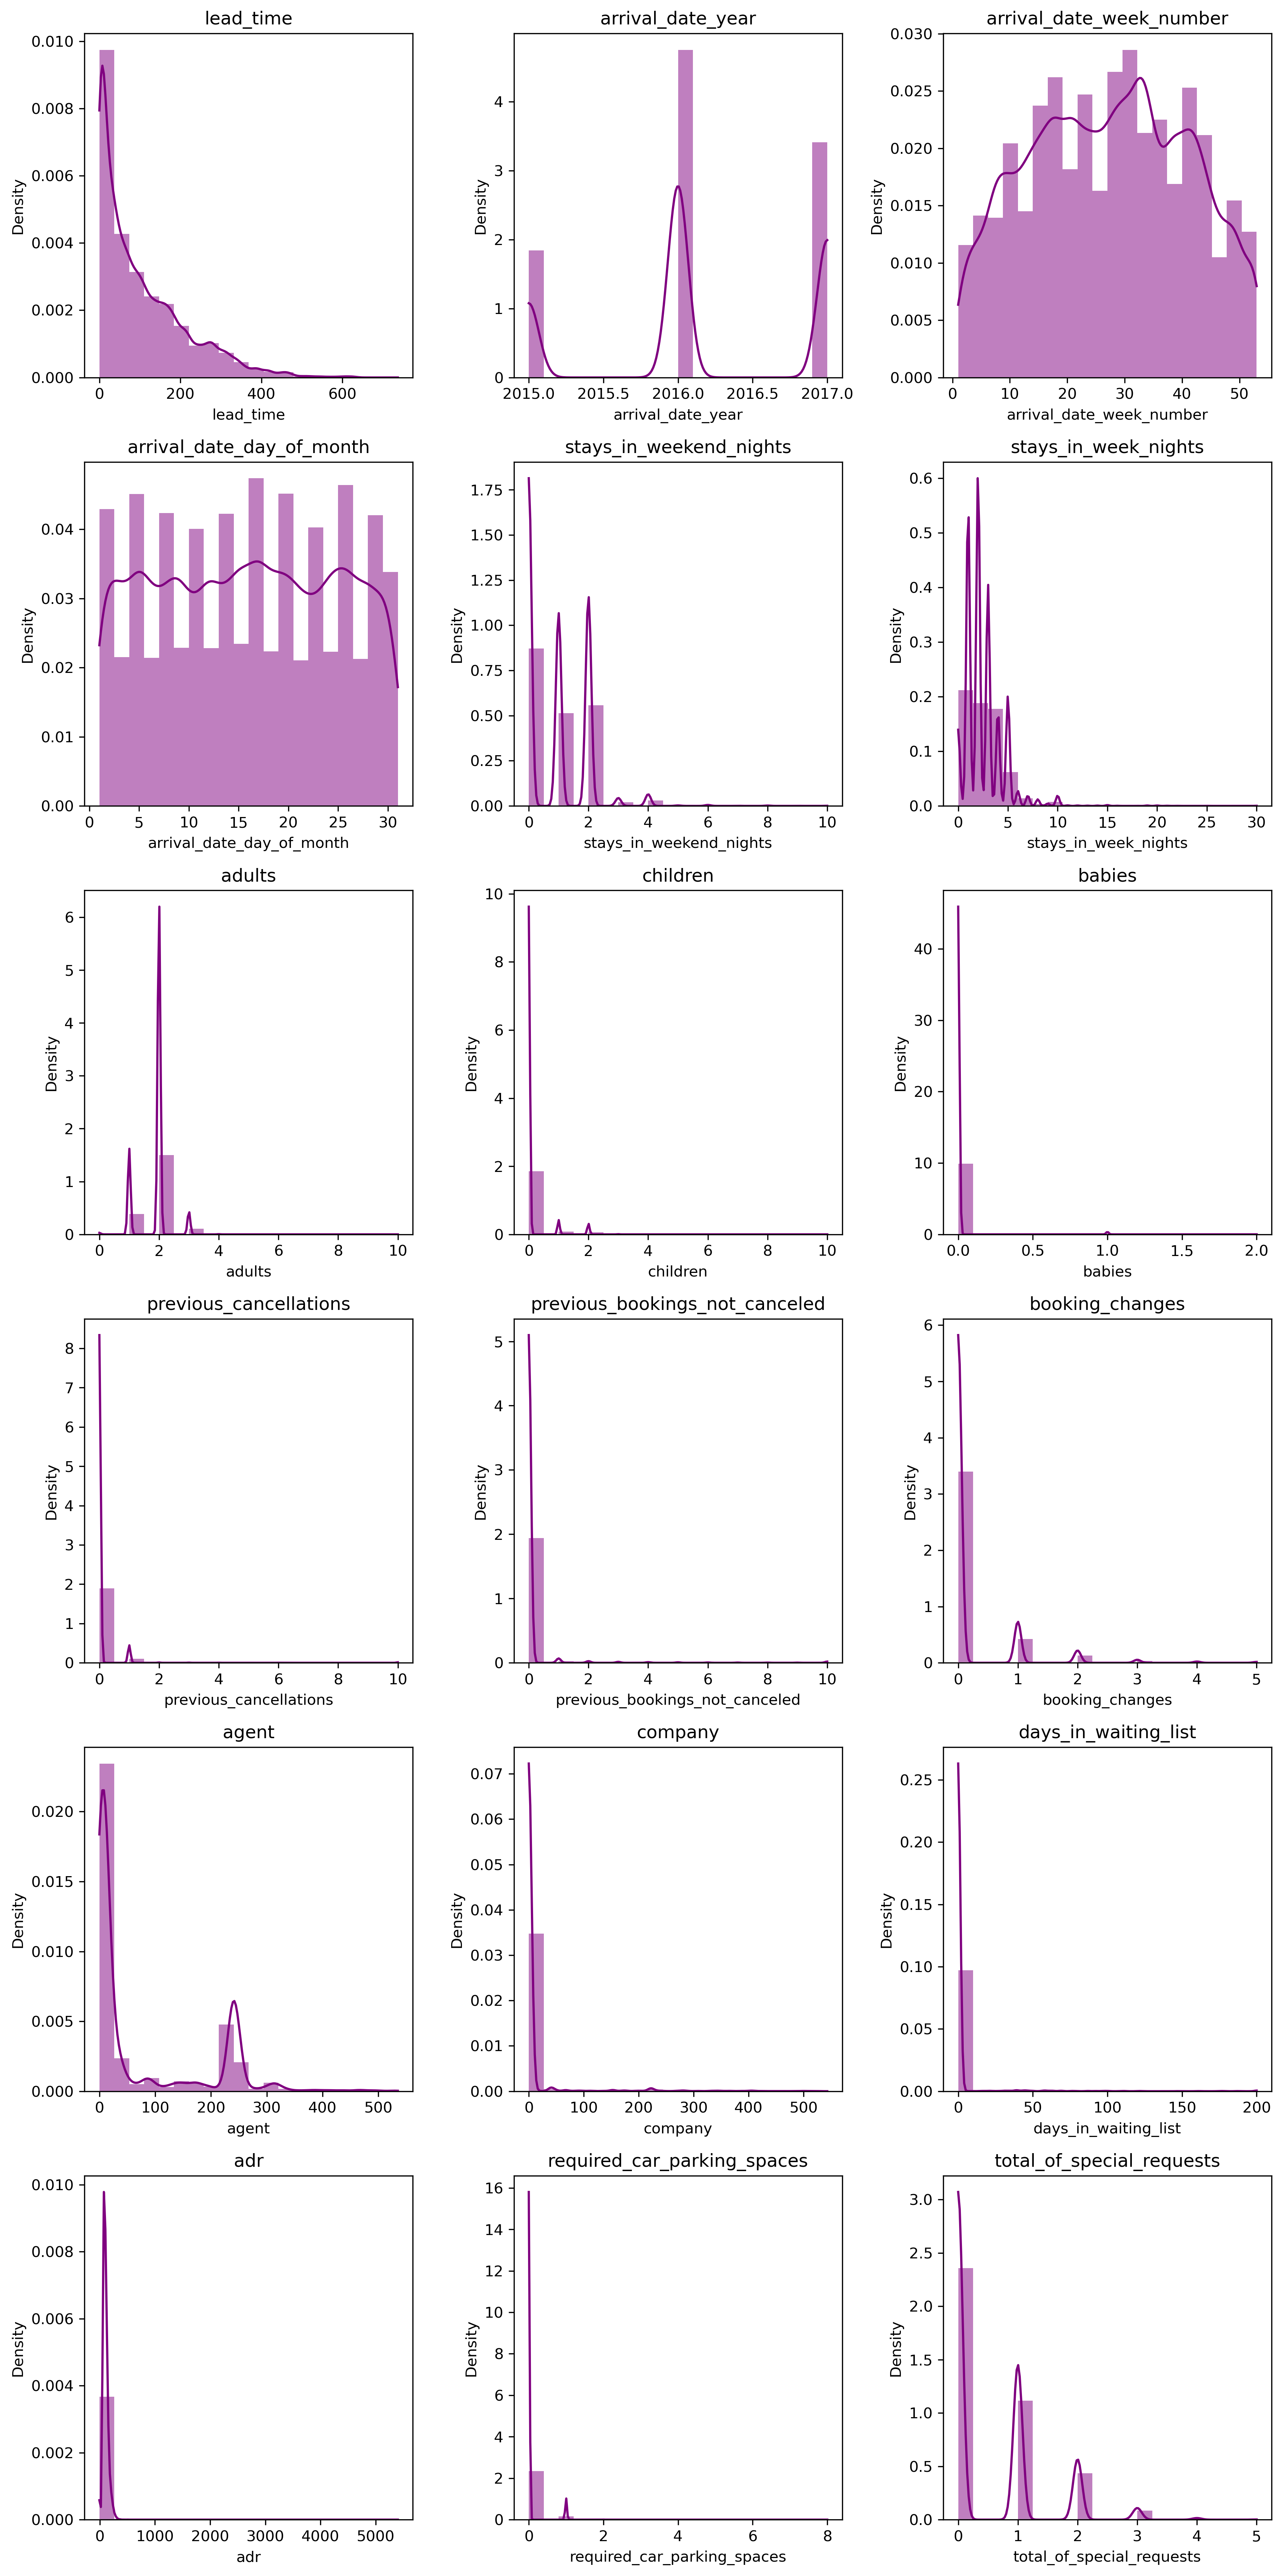

In [74]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns needed
num_plots = len(numeric_columns)
cols = 3  # Fixed number of columns
rows = int(np.ceil(num_plots / cols))  # Dynamically calculate the number of rows

plt.figure(figsize=(12, rows * 4), dpi=300)  # Adjust figure height based on rows
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=20, color='Purple', stat='density', linewidth=0)
    plt.title(f'{col}')
    plt.tight_layout()

plt.show()


**Lead Time (Thời gian đặt trước)**
- Phân bố của lead time lệch phải, cho thấy hầu hết các đặt phòng được thực hiện gần ngày đến, trong khi một số ít được đặt trước rất lâu. Điều này gợi ý rằng phần lớn khách lập kế hoạch ở phút chót, nhưng vẫn có một số khách lên kế hoạch từ trước.

**Arrival Date Year (Năm đến)**
- Phân bố năm đến tập trung vào một số năm cụ thể, với xu hướng tăng nhẹ theo thời gian. Điều này có thể phản ánh sự gia tăng tổng thể trong số lượng đặt phòng hoặc các biến động theo mùa trong hành vi du lịch.

**Stays in Weekend Nights (Số đêm cuối tuần)**
- Phân bố lệch phải, với hầu hết khách chỉ lưu trú ngắn trong cuối tuần. Một số ít khách kéo dài kỳ nghỉ cuối tuần, có thể do dịp đặc biệt hoặc kỳ nghỉ dài hơn.

**Stays in Week Nights (Số đêm trong tuần)**
- Tương tự như cuối tuần, phân bố cũng lệch phải. Hầu hết khách lưu trú ngắn trong tuần, một số ít chọn ở lâu hơn, có thể vì công việc hoặc nghỉ dưỡng.

**Adults, Children, and Babies (Người lớn, trẻ em, và em bé)**
- Hầu hết đặt phòng chỉ có người lớn, ít đặt có trẻ em hoặc em bé. Điều này cho thấy đa số khách là cặp đôi hoặc đi một mình.

**Previous Cancellations and Bookings Not Canceled (Hủy trước và đặt trước chưa hủy)**
- Phân bố lệch phải, cho thấy hầu hết khách có lịch sử đặt phòng “sạch” với ít hủy. Một số ít khách có tỷ lệ hủy cao, có thể là vấn đề cần lưu ý trong quản lý doanh thu.

**Booking Changes (Thay đổi đặt phòng)**
- Phân bố lệch phải, hầu hết khách ít hoặc không thay đổi đặt phòng. Một số ít khách thay đổi nhiều lần, thể hiện sự không chắc chắn hoặc linh hoạt trong kế hoạch du lịch.

**Kết luận**
- Lệch phải của lead time và số đêm lưu trú cho thấy hầu hết khách thích các chuyến đi ngắn và linh hoạt.
- Sự xuất hiện của outliers trong số đêm lưu trú và thay đổi đặt phòng gợi ý cần marketing nhắm mục tiêu hoặc chính sách đặt phòng linh hoạt.
- Phân bố người lớn, trẻ em, em bé nhấn mạnh tầm quan trọng của việc phục vụ khách trưởng thành, đồng thời cân nhắc các lựa chọn thân thiện với gia đình.


